In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv('../data/children_products/clildren_product_showcase.csv')
df.head()

,phone,ОбщаяСуммаЗаказов,СредняяСуммаЗаказов,ОбщаяМаржаЗаказов,СредняяМаржаЗаказов,КоличествоТоварныхПозиций,КоличествоЗаказов_x,КоличествоЗаказов_y,ДоляОтменненыхЗаказов,ДоляДоставленныхЗаказов,...,Тип_ИНОЕ,Тип_КГТ,Тип_ОДЕЖДА,Тип_ППКП,МетодДоставки_Курьерская,МетодДоставки_Магазины,МетодДоставки_Пункт выдачи,Гео_МО,Гео_Москва,Гео_Регионы
0,55574854-48574951555577,0.0,0.0,0.00,0.00,0.0,1,1,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,55575453-56535648535679,4875.0,2437.5,1603.48,801.74,6.0,2,2,0.0,1.0,...,0.000000,0.000000,0.250000,0.500000,0.0,1.0,0.0,0.0,0.0,1.0
2,55574950-57515657535772,3325.0,3325.0,2176.00,2176.00,1.0,1,1,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,1.0
3,55574851-55545249535475,9650.0,4825.0,1277.46,638.73,26.0,2,2,0.0,1.0,...,0.076923,0.019231,0.038462,0.865385,1.0,0.0,0.0,0.0,1.0,0.0
4,55574854-56495552515179,528.0,528.0,204.07,204.07,4.0,1,1,0.0,1.0,...,0.000000,0.000000,0.000000,0.500000,0.0,1.0,0.0,0.0,0.0,1.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114448 entries, 0 to 114447
Columns: 132 entries, phone to Гео_Регионы
dtypes: float64(129), int64(2), object(1)
memory usage: 115.3+ MB


In [34]:
print("Количество пропущенных значений в каждом столбце:")
df.isnull().sum()

Количество пропущенных значений в каждом столбце:


phone                         0
ОбщаяСуммаЗаказов             0
СредняяСуммаЗаказов           0
ОбщаяМаржаЗаказов             0
СредняяМаржаЗаказов           0
                             ..
МетодДоставки_Магазины        0
МетодДоставки_Пункт выдачи    0
Гео_МО                        0
Гео_Москва                    0
Гео_Регионы                   0
Length: 132, dtype: int64

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, HDBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import (
    silhouette_score, 
    davies_bouldin_score, 
    calinski_harabasz_score
)

In [36]:
X = df.drop(['phone'], axis=1, errors='ignore')
X = X.dropna()

In [37]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [38]:
k_range = range(2, 11)
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    
    silhouette_scores.append(silhouette_score(X_scaled, labels))
    davies_bouldin_scores.append(davies_bouldin_score(X_scaled, labels))
    calinski_harabasz_scores.append(calinski_harabasz_score(X_scaled, labels))

KeyboardInterrupt: 

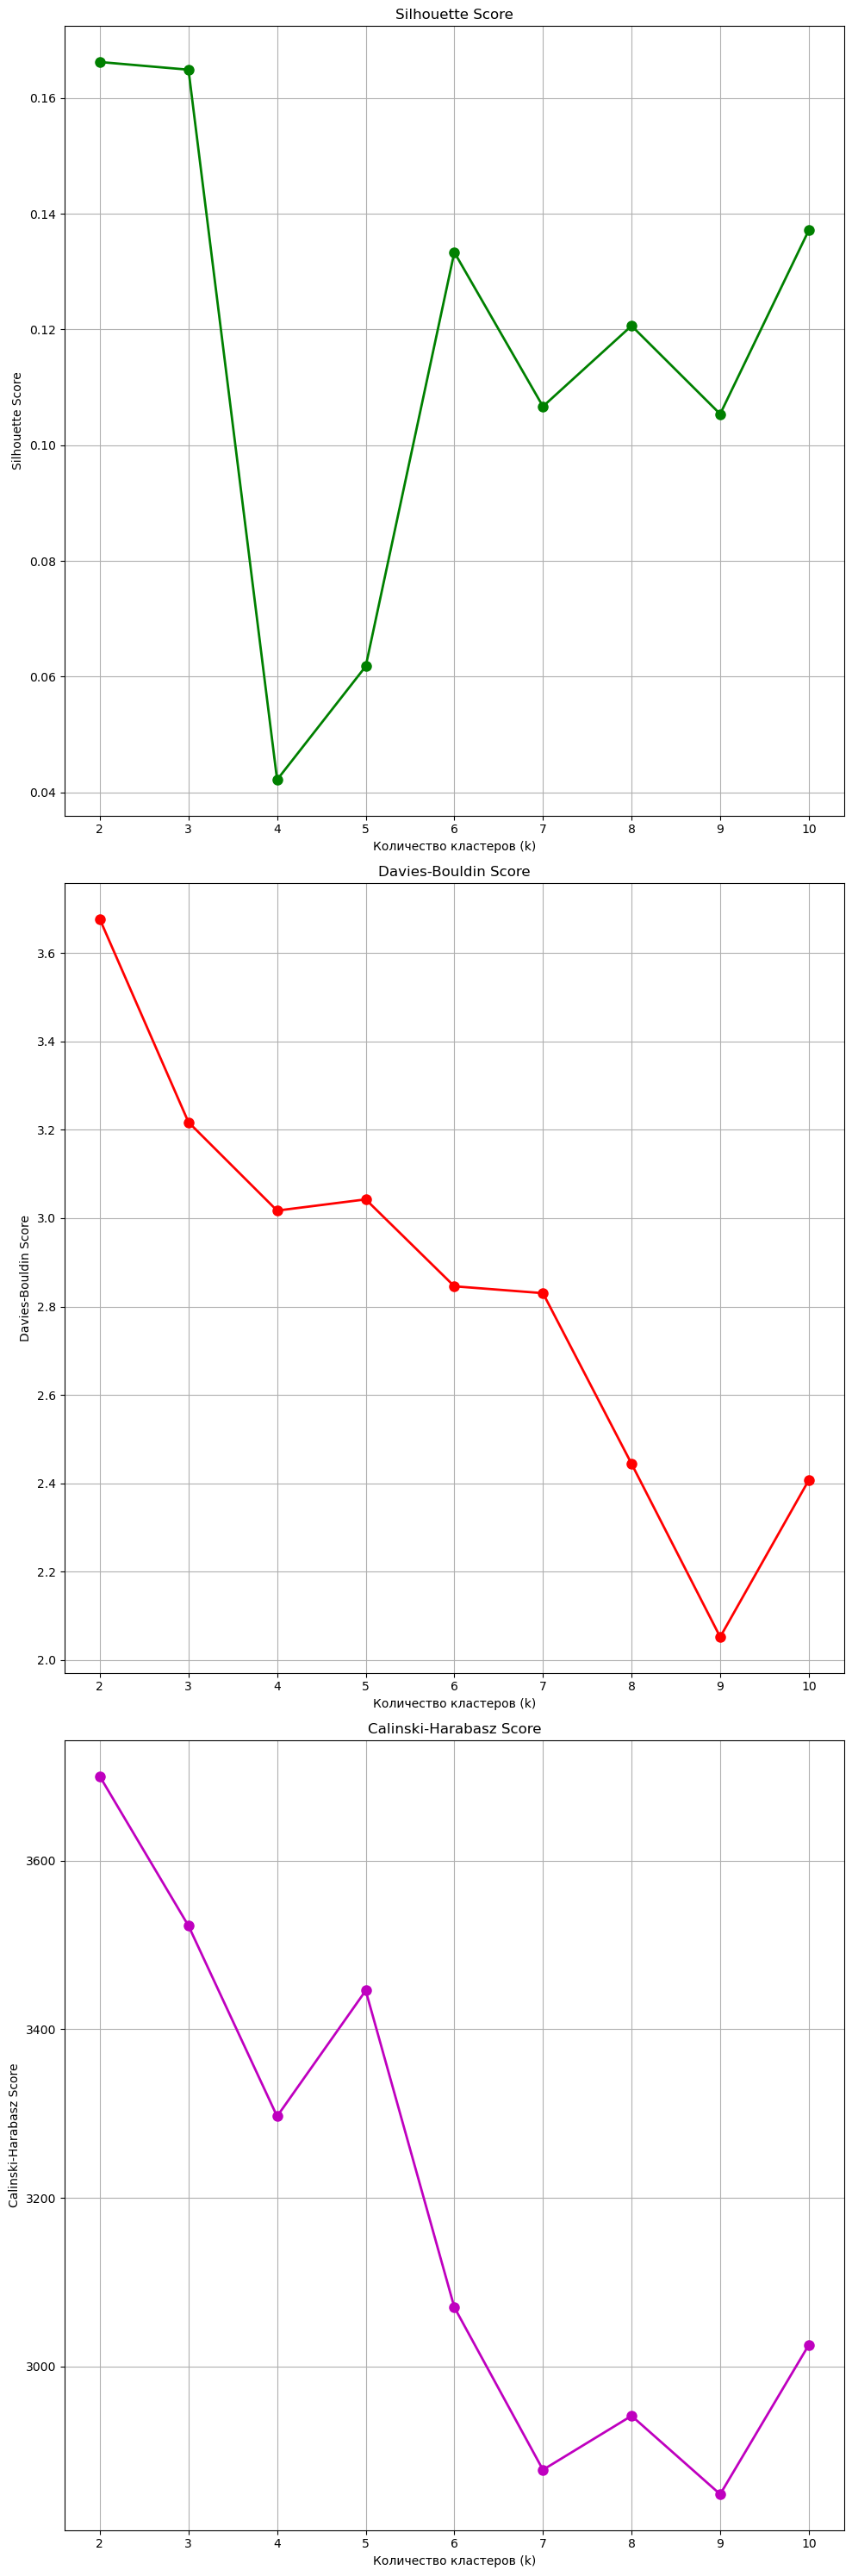

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 30))

axes[0].plot(k_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
axes[0].set_xlabel('Количество кластеров (k)')
axes[0].set_ylabel('Silhouette Score')
axes[0].set_title('Silhouette Score')
axes[0].grid(True)

axes[1].plot(k_range, davies_bouldin_scores, 'ro-', linewidth=2, markersize=8)
axes[1].set_xlabel('Количество кластеров (k)')
axes[1].set_ylabel('Davies-Bouldin Score')
axes[1].set_title('Davies-Bouldin Score')
axes[1].grid(True)

axes[2].plot(k_range, calinski_harabasz_scores, 'mo-', linewidth=2, markersize=8)
axes[2].set_xlabel('Количество кластеров (k)')
axes[2].set_ylabel('Calinski-Harabasz Score')
axes[2].set_title('Calinski-Harabasz Score')
axes[2].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
optimal_k = 6

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

df['kmeans_cluster'] = kmeans_labels

print(f"K-Means с k={optimal_k}")
print(f"Распределение по кластерам:")
print(df['kmeans_cluster'].value_counts().sort_index())
print(f"Метрики качества:")
print(f"Silhouette Score: {silhouette_score(X_scaled, kmeans_labels):.2f}")
print(f"Davies-Bouldin Score: {davies_bouldin_score(X_scaled, kmeans_labels):.2f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_score(X_scaled, kmeans_labels):.2f}")

K-Means с k=6
Распределение по кластерам:
kmeans_cluster
0    14050
1    44072
2    11396
3    11452
4     8861
5    24617
Name: count, dtype: int64
Метрики качества:
Silhouette Score: 0.13
Davies-Bouldin Score: 2.85
Calinski-Harabasz Score: 3070.00


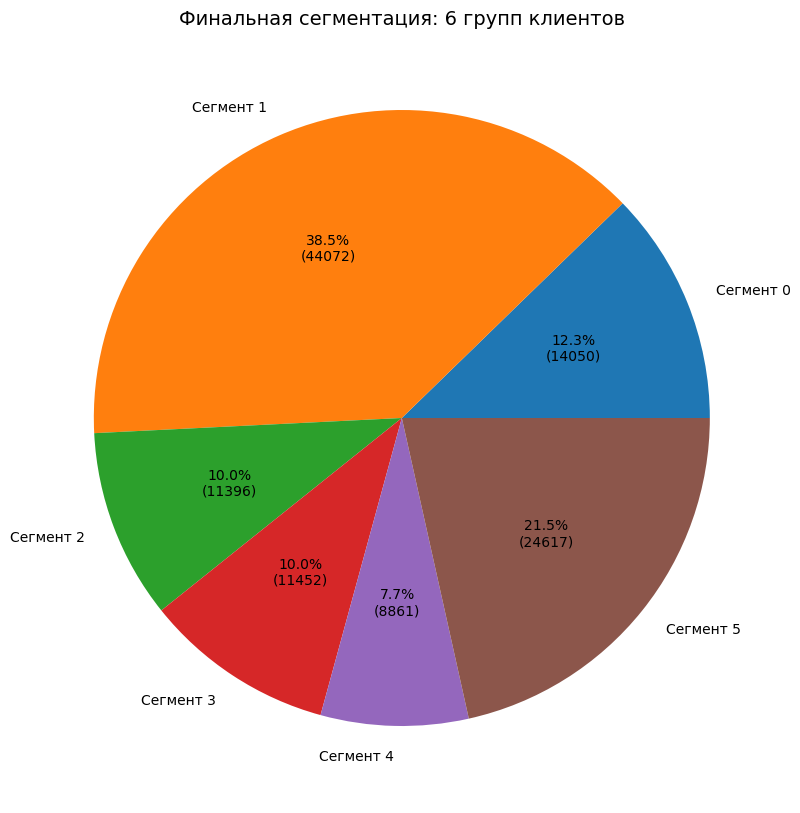

+---+-----------+-------+-------+
| 0 | Сегмент 0 | 14050 | 12.28 |
| 1 | Сегмент 1 | 44072 | 38.51 |
| 2 | Сегмент 2 | 11396 |  9.96 |
| 3 | Сегмент 3 | 11452 | 10.01 |
| 4 | Сегмент 4 |  8861 |  7.74 |
| 5 | Сегмент 5 | 24617 | 21.51 |
+---+-----------+-------+-------+


In [ ]:
from tabulate import tabulate

cluster_counts = df['kmeans_cluster'].value_counts().sort_index()

plt.figure(figsize=(10, 10))
plt.pie(
    cluster_counts,
    labels=[f"Сегмент {i}" for i in cluster_counts.index],
    autopct=lambda p: f'{p:.1f}%\n({int(p*len(df)/100)})',
)

plt.title(f'Финальная сегментация: {optimal_k} групп клиентов', fontsize=14)
plt.show()

summary_table = pd.DataFrame({
    'Сегмент': [f"Сегмент {i}" for i in cluster_counts.index],
    'Количество клиентов': cluster_counts.values,
    'Доля (%)': (cluster_counts.values / len(df) * 100).round(2)
})

print(tabulate(summary_table, tablefmt='psql'))

In [ ]:
cluster_profile = df.drop(['phone'], axis=1, errors='ignore').groupby('kmeans_cluster').mean().T

cluster_profile.style.background_gradient(cmap='coolwarm', axis=1).format("{:.2f}")

kmeans_cluster,0,1,2,3,4,5
ОбщаяСуммаЗаказов,8032.67,1027.18,6367.62,3887.55,5215.68,2536.79
СредняяСуммаЗаказов,7370.89,807.28,3252.40,2839.48,3126.12,2135.47
ОбщаяМаржаЗаказов,2690.74,146.45,1763.99,1265.13,1196.82,613.58
СредняяМаржаЗаказов,2489.00,114.03,900.48,971.58,731.17,513.21
КоличествоТоварныхПозиций,1.22,0.62,7.11,3.27,5.90,2.61
КоличествоЗаказов_x,1.28,1.34,2.50,1.76,2.01,1.41
КоличествоЗаказов_y,1.28,1.34,2.50,1.76,2.01,1.41
ДоляОтменненыхЗаказов,0.05,0.23,0.06,0.06,0.06,0.04
ДоляДоставленныхЗаказов,0.93,0.35,0.91,0.90,0.92,0.94
ОбщаяСуммаТоваров,1.43,1.13,33.46,4.95,12.11,3.64


In [39]:
X = df.drop(['phone', 'kmeans_cluster'], axis=1, errors='ignore')
X = X.dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [40]:
X.shape

(114448, 131)

In [41]:
bic_scores = []
aic_scores = []
em_silhouette_scores = []

for k in k_range:
    print(f"Calculating: {k}")
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X_scaled)
    labels = gmm.predict(X_scaled)
    
    bic_scores.append(gmm.bic(X_scaled))
    aic_scores.append(gmm.aic(X_scaled))
    em_silhouette_scores.append(silhouette_score(X_scaled, labels))


Calculating: 2
Calculating: 3
Calculating: 4
Calculating: 5
Calculating: 6
Calculating: 7
Calculating: 8
Calculating: 9
Calculating: 10


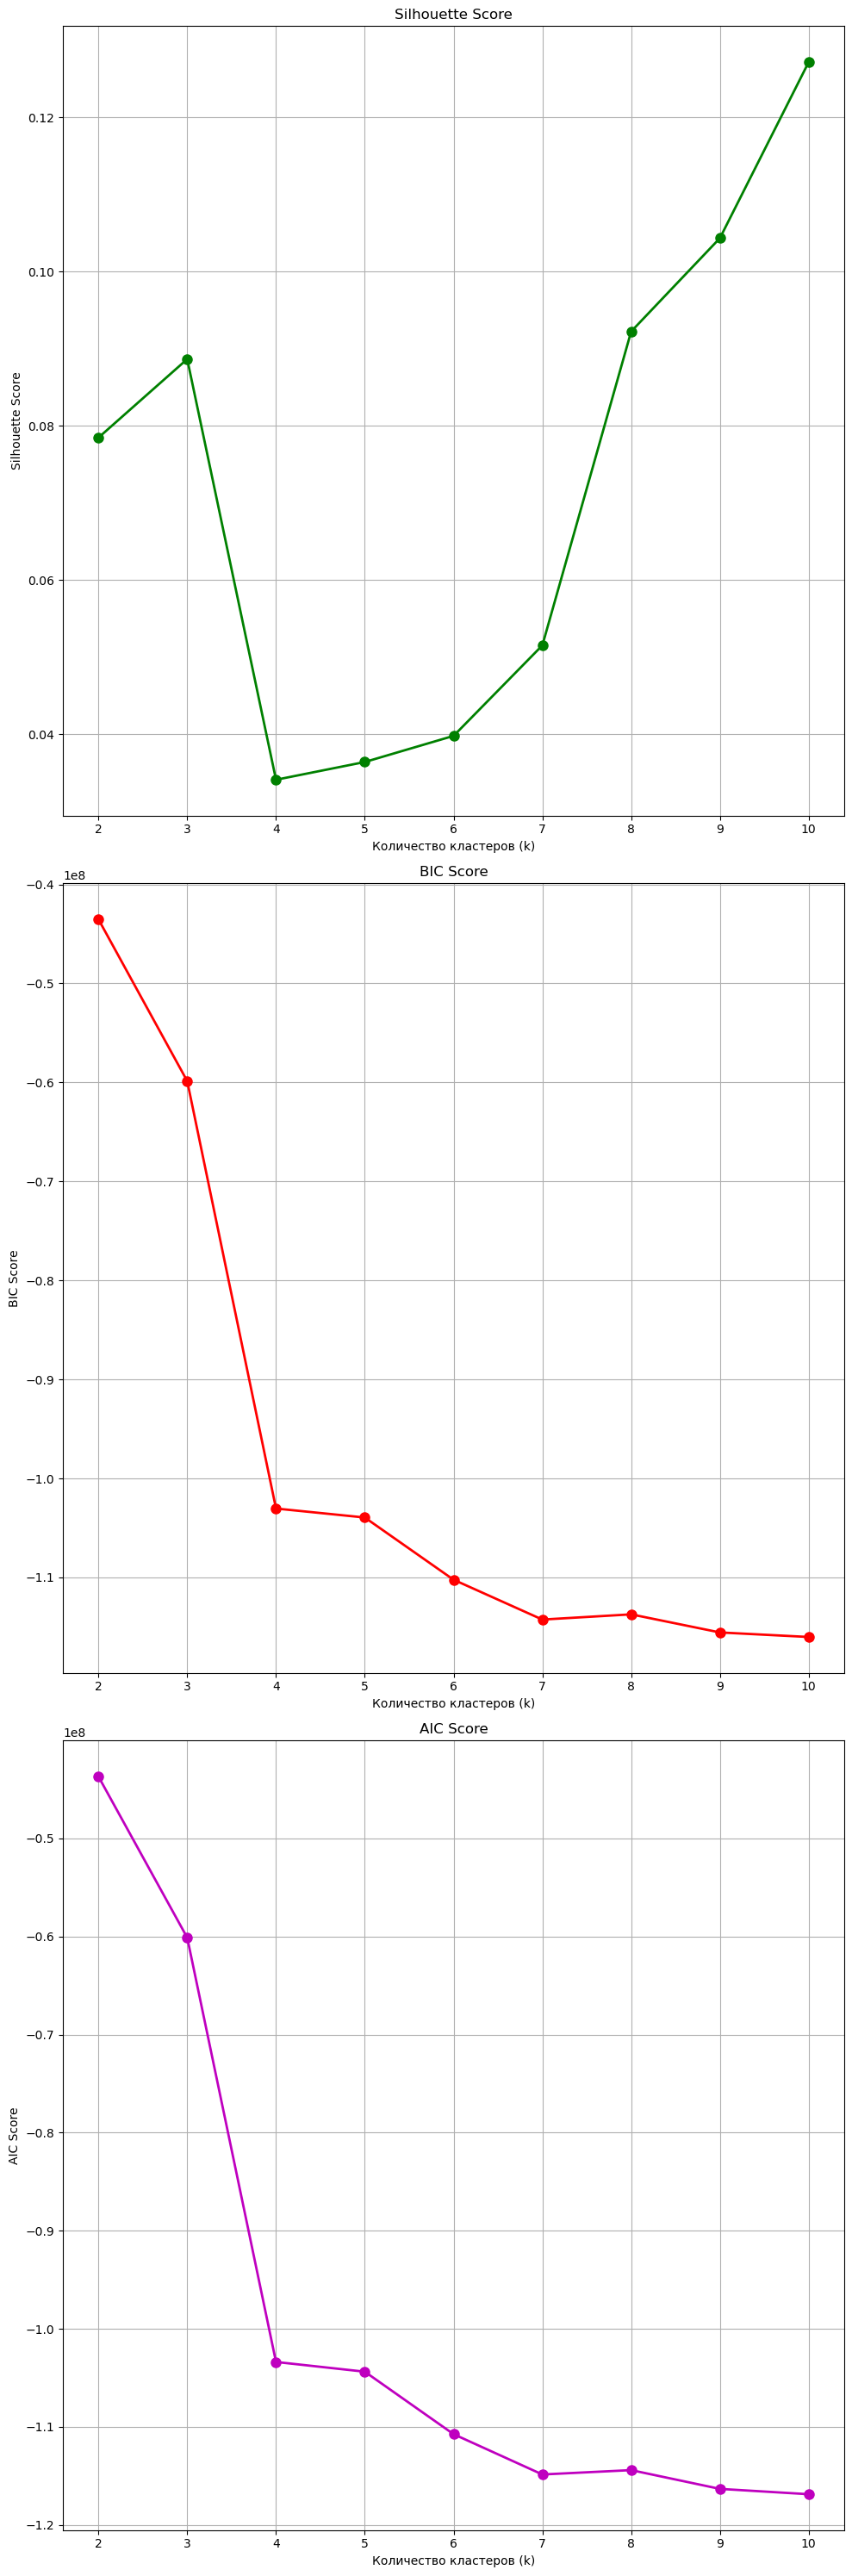

In [42]:
fig, axes = plt.subplots(3, 1, figsize=(10, 30))

axes[0].plot(k_range, em_silhouette_scores, 'go-', linewidth=2, markersize=8)
axes[0].set_xlabel('Количество кластеров (k)')
axes[0].set_ylabel('Silhouette Score')
axes[0].set_title('Silhouette Score')
axes[0].grid(True)

axes[1].plot(k_range, bic_scores, 'ro-', linewidth=2, markersize=8)
axes[1].set_xlabel('Количество кластеров (k)')
axes[1].set_ylabel('BIC Score')
axes[1].set_title('BIC Score')
axes[1].grid(True)

axes[2].plot(k_range, aic_scores, 'mo-', linewidth=2, markersize=8)
axes[2].set_xlabel('Количество кластеров (k)')
axes[2].set_ylabel('AIC Score')
axes[2].set_title('AIC Score')
axes[2].grid(True)

plt.tight_layout()
plt.show()

In [43]:
optimal_k_em = 7

gmm = GaussianMixture(n_components=optimal_k_em, random_state=42)
em_labels = gmm.fit_predict(X_scaled)

df['em_cluster'] = em_labels

print(f"EM с k={optimal_k_em}")
print("Распределение по кластерам:")
print(df['em_cluster'].value_counts().sort_index())

EM с k=7
Распределение по кластерам:
em_cluster
0    27252
1    25117
2    12956
3     3075
4    18369
5    25543
6     2136
Name: count, dtype: int64


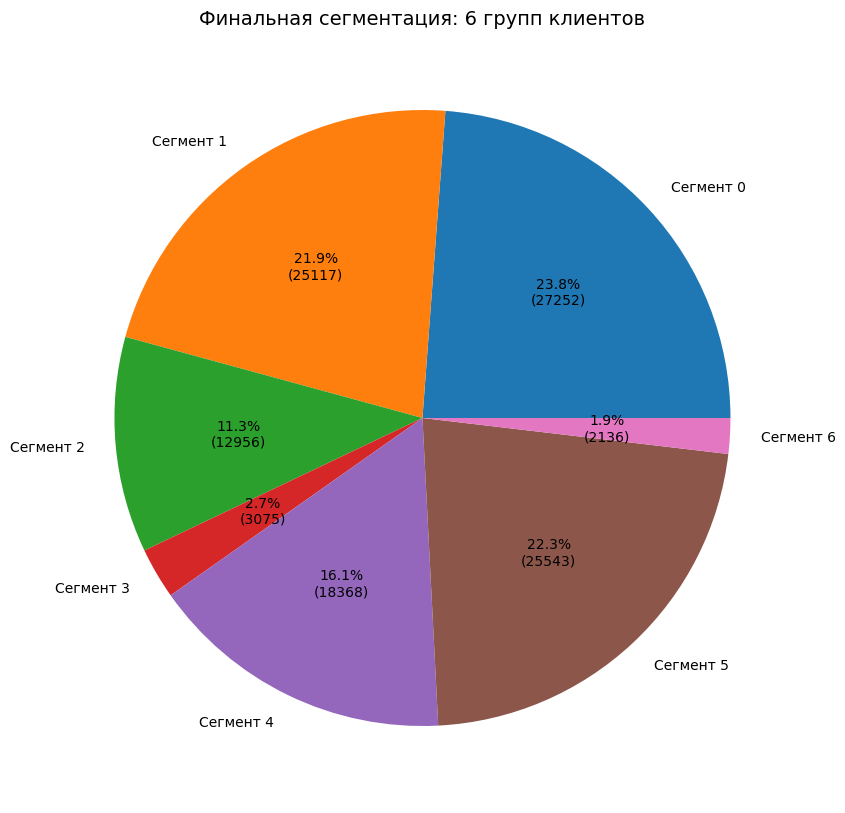

+---+-----------+-------+-------+
| 0 | Сегмент 0 | 27252 | 23.81 |
| 1 | Сегмент 1 | 25117 | 21.95 |
| 2 | Сегмент 2 | 12956 | 11.32 |
| 3 | Сегмент 3 |  3075 |  2.69 |
| 4 | Сегмент 4 | 18369 | 16.05 |
| 5 | Сегмент 5 | 25543 | 22.32 |
| 6 | Сегмент 6 |  2136 |  1.87 |
+---+-----------+-------+-------+


In [ ]:
from tabulate import tabulate

cluster_counts = df['em_cluster'].value_counts().sort_index()

plt.figure(figsize=(10, 10))
plt.pie(
    cluster_counts,
    labels=[f"Сегмент {i}" for i in cluster_counts.index],
    autopct=lambda p: f'{p:.1f}%\n({int(p*len(df)/100)})',
)

plt.title(f'Финальная сегментация: {optimal_k} групп клиентов', fontsize=14)
plt.show()

summary_table = pd.DataFrame({
    'Сегмент': [f"Сегмент {i}" for i in cluster_counts.index],
    'Количество клиентов': cluster_counts.values,
    'Доля (%)': (cluster_counts.values / len(df) * 100).round(2)
})

print(tabulate(summary_table, tablefmt='psql'))

In [45]:
cluster_profile = df.drop(['phone'], axis=1, errors='ignore').groupby('em_cluster').mean().T

cluster_profile.style.background_gradient(cmap='coolwarm', axis=1).format("{:.2f}")

em_cluster,0,1,2,3,4,5,6
ОбщаяСуммаЗаказов,0.00,4942.33,4100.70,6089.33,4670.95,2994.59,11983.72
СредняяСуммаЗаказов,0.00,4586.52,2797.93,3468.82,2855.20,2525.89,4639.03
ОбщаяМаржаЗаказов,0.00,1420.59,1235.34,1356.18,1130.00,637.67,5457.88
СредняяМаржаЗаказов,0.00,1338.45,886.41,776.62,713.06,538.66,2878.97
КоличествоТоварныхПозиций,0.00,1.39,3.88,6.53,5.73,1.77,11.06
КоличествоЗаказов_x,1.22,1.32,1.89,2.19,1.98,1.37,4.32
КоличествоЗаказов_y,1.22,1.32,1.89,2.19,1.98,1.37,4.32
ДоляОтменненыхЗаказов,0.33,0.05,0.06,0.06,0.06,0.04,0.06
ДоляДоставленныхЗаказов,0.00,0.93,0.90,0.92,0.91,0.93,0.91
ОбщаяСуммаТоваров,0.00,1.95,7.04,23.59,16.87,2.46,55.76


In [46]:
optimal_k_em = 4

gmm = GaussianMixture(n_components=optimal_k_em, random_state=42)
em_labels = gmm.fit_predict(X_scaled)

df['em_cluster'] = em_labels

print(f"EM с k={optimal_k_em}")
print("Распределение по кластерам:")
print(df['em_cluster'].value_counts().sort_index())

EM с k=4
Распределение по кластерам:
em_cluster
0    27252
1    44194
2    37390
3     5612
Name: count, dtype: int64


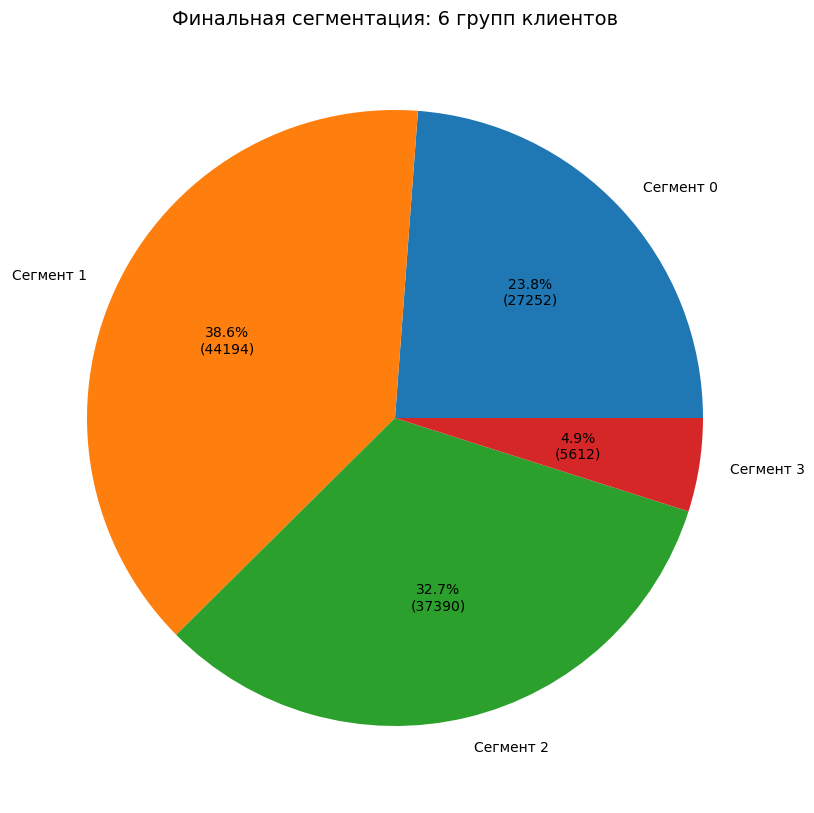

+---+-----------+-------+-------+
| 0 | Сегмент 0 | 27252 | 23.81 |
| 1 | Сегмент 1 | 44194 | 38.61 |
| 2 | Сегмент 2 | 37390 | 32.67 |
| 3 | Сегмент 3 |  5612 |  4.9  |
+---+-----------+-------+-------+


In [47]:
from tabulate import tabulate

cluster_counts = df['em_cluster'].value_counts().sort_index()

plt.figure(figsize=(10, 10))
plt.pie(
    cluster_counts,
    labels=[f"Сегмент {i}" for i in cluster_counts.index],
    autopct=lambda p: f'{p:.1f}%\n({int(p*len(df)/100)})',
)

plt.title(f'Финальная сегментация: {optimal_k} групп клиентов', fontsize=14)
plt.show()

summary_table = pd.DataFrame({
    'Сегмент': [f"Сегмент {i}" for i in cluster_counts.index],
    'Количество клиентов': cluster_counts.values,
    'Доля (%)': (cluster_counts.values / len(df) * 100).round(2)
})

print(tabulate(summary_table, tablefmt='psql'))

In [48]:
cluster_profile = df.drop(['phone'], axis=1, errors='ignore').groupby('em_cluster').mean().T

cluster_profile.style.background_gradient(cmap='coolwarm', axis=1).format("{:.2f}")

em_cluster,0,1,2,3
ОбщаяСуммаЗаказов,0.00,4264.67,4130.16,7302.06
СредняяСуммаЗаказов,0.00,3827.60,2645.29,3728.97
ОбщаяМаржаЗаказов,0.00,1116.44,1064.65,2746.29
СредняяМаржаЗаказов,0.00,1019.91,708.20,1593.58
КоличествоТоварныхПозиций,0.00,1.48,4.86,5.75
КоличествоЗаказов_x,1.22,1.35,1.88,2.67
КоличествоЗаказов_y,1.22,1.35,1.88,2.67
ДоляОтменненыхЗаказов,0.33,0.05,0.06,0.05
ДоляДоставленныхЗаказов,0.00,0.93,0.91,0.92
ОбщаяСуммаТоваров,0.00,2.11,13.22,20.82


HDBSCAN получился странненький

In [49]:
min_cluster_size_range = [5, 10, 20, 30]
min_samples_range = [None, 5, 10, 20]


hdbscan_results = []

for mcs in min_cluster_size_range:
    for ms in min_samples_range:
        print(f"min_cluster_size={mcs}, min_samples={ms}: ")
        hdb = HDBSCAN(
            min_cluster_size=mcs,
            min_samples=ms,
            n_jobs=-1
        )
        labels = hdb.fit_predict(X_scaled)

        mask = labels >= 0
        n_clusters = len(set(labels[mask])) if mask.any() else 0
        n_noise = (~mask).sum()

        if n_clusters > 1 and mask.sum() > 1:
            sil = silhouette_score(X_scaled[mask], labels[mask])
            db = davies_bouldin_score(X_scaled[mask], labels[mask])
            ch = calinski_harabasz_score(X_scaled[mask], labels[mask])
        else:
            sil, db, ch = -1, -1, -1

        hdbscan_results.append({
            "min_cluster_size": mcs,
            "min_samples": ms,
            "n_clusters": n_clusters,
            "n_noise": int(n_noise),
            "silhouette": sil,
            "davies_bouldin": db,
            "calinski_harabasz": ch,
            "labels": labels
        })

        print(f"min_cluster_size={mcs}, min_samples={ms}: "
              f"clusters={n_clusters}, noise={n_noise}, "
              f"sil={sil:.4f}, db={db:.4f}, ch={ch:.2f}")

min_cluster_size=5, min_samples=None: 


/opt/homebrew/Caskroom/miniconda/base/envs/data_analysis/lib/python3.11/site-packages/sklearn/cluster/_hdbscan/hdbscan.py:722: FutureWarning: The default value of `copy` will change from False to True in 1.10. Explicitly set a value for `copy` to silence this warning.
  warn(


min_cluster_size=5, min_samples=None: clusters=3686, noise=43655, sil=0.7537, db=0.5784, ch=3052.02
min_cluster_size=5, min_samples=5: 


/opt/homebrew/Caskroom/miniconda/base/envs/data_analysis/lib/python3.11/site-packages/sklearn/cluster/_hdbscan/hdbscan.py:722: FutureWarning: The default value of `copy` will change from False to True in 1.10. Explicitly set a value for `copy` to silence this warning.
  warn(


min_cluster_size=5, min_samples=5: clusters=3686, noise=43655, sil=0.7537, db=0.5784, ch=3052.02
min_cluster_size=5, min_samples=10: 


/opt/homebrew/Caskroom/miniconda/base/envs/data_analysis/lib/python3.11/site-packages/sklearn/cluster/_hdbscan/hdbscan.py:722: FutureWarning: The default value of `copy` will change from False to True in 1.10. Explicitly set a value for `copy` to silence this warning.
  warn(


min_cluster_size=5, min_samples=10: clusters=1611, noise=47210, sil=0.7590, db=0.5874, ch=7331.51
min_cluster_size=5, min_samples=20: 


/opt/homebrew/Caskroom/miniconda/base/envs/data_analysis/lib/python3.11/site-packages/sklearn/cluster/_hdbscan/hdbscan.py:722: FutureWarning: The default value of `copy` will change from False to True in 1.10. Explicitly set a value for `copy` to silence this warning.
  warn(


min_cluster_size=5, min_samples=20: clusters=811, noise=49507, sil=0.7771, db=0.5403, ch=12394.56
min_cluster_size=10, min_samples=None: 


/opt/homebrew/Caskroom/miniconda/base/envs/data_analysis/lib/python3.11/site-packages/sklearn/cluster/_hdbscan/hdbscan.py:722: FutureWarning: The default value of `copy` will change from False to True in 1.10. Explicitly set a value for `copy` to silence this warning.
  warn(


min_cluster_size=10, min_samples=None: clusters=1382, noise=47008, sil=0.7541, db=0.5994, ch=7891.90
min_cluster_size=10, min_samples=5: 


/opt/homebrew/Caskroom/miniconda/base/envs/data_analysis/lib/python3.11/site-packages/sklearn/cluster/_hdbscan/hdbscan.py:722: FutureWarning: The default value of `copy` will change from False to True in 1.10. Explicitly set a value for `copy` to silence this warning.
  warn(


min_cluster_size=10, min_samples=5: clusters=1754, noise=42842, sil=0.7102, db=0.7034, ch=4901.83
min_cluster_size=10, min_samples=10: 


/opt/homebrew/Caskroom/miniconda/base/envs/data_analysis/lib/python3.11/site-packages/sklearn/cluster/_hdbscan/hdbscan.py:722: FutureWarning: The default value of `copy` will change from False to True in 1.10. Explicitly set a value for `copy` to silence this warning.
  warn(


min_cluster_size=10, min_samples=10: clusters=1382, noise=47008, sil=0.7541, db=0.5994, ch=7891.90
min_cluster_size=10, min_samples=20: 


/opt/homebrew/Caskroom/miniconda/base/envs/data_analysis/lib/python3.11/site-packages/sklearn/cluster/_hdbscan/hdbscan.py:722: FutureWarning: The default value of `copy` will change from False to True in 1.10. Explicitly set a value for `copy` to silence this warning.
  warn(


min_cluster_size=10, min_samples=20: clusters=729, noise=49048, sil=0.7738, db=0.5325, ch=13533.82
min_cluster_size=20, min_samples=None: 


/opt/homebrew/Caskroom/miniconda/base/envs/data_analysis/lib/python3.11/site-packages/sklearn/cluster/_hdbscan/hdbscan.py:722: FutureWarning: The default value of `copy` will change from False to True in 1.10. Explicitly set a value for `copy` to silence this warning.
  warn(


min_cluster_size=20, min_samples=None: clusters=638, noise=48434, sil=0.7645, db=0.5450, ch=15153.21
min_cluster_size=20, min_samples=5: 


/opt/homebrew/Caskroom/miniconda/base/envs/data_analysis/lib/python3.11/site-packages/sklearn/cluster/_hdbscan/hdbscan.py:722: FutureWarning: The default value of `copy` will change from False to True in 1.10. Explicitly set a value for `copy` to silence this warning.
  warn(


min_cluster_size=20, min_samples=5: clusters=865, noise=43693, sil=0.6968, db=0.7695, ch=6954.77
min_cluster_size=20, min_samples=10: 


/opt/homebrew/Caskroom/miniconda/base/envs/data_analysis/lib/python3.11/site-packages/sklearn/cluster/_hdbscan/hdbscan.py:722: FutureWarning: The default value of `copy` will change from False to True in 1.10. Explicitly set a value for `copy` to silence this warning.
  warn(


min_cluster_size=20, min_samples=10: clusters=774, noise=46197, sil=0.7334, db=0.6600, ch=9643.49
min_cluster_size=20, min_samples=20: 


/opt/homebrew/Caskroom/miniconda/base/envs/data_analysis/lib/python3.11/site-packages/sklearn/cluster/_hdbscan/hdbscan.py:722: FutureWarning: The default value of `copy` will change from False to True in 1.10. Explicitly set a value for `copy` to silence this warning.
  warn(


min_cluster_size=20, min_samples=20: clusters=638, noise=48434, sil=0.7645, db=0.5450, ch=15153.21
min_cluster_size=30, min_samples=None: 


/opt/homebrew/Caskroom/miniconda/base/envs/data_analysis/lib/python3.11/site-packages/sklearn/cluster/_hdbscan/hdbscan.py:722: FutureWarning: The default value of `copy` will change from False to True in 1.10. Explicitly set a value for `copy` to silence this warning.
  warn(


min_cluster_size=30, min_samples=None: clusters=420, noise=48734, sil=0.7646, db=0.5594, ch=20000.52
min_cluster_size=30, min_samples=5: 


/opt/homebrew/Caskroom/miniconda/base/envs/data_analysis/lib/python3.11/site-packages/sklearn/cluster/_hdbscan/hdbscan.py:722: FutureWarning: The default value of `copy` will change from False to True in 1.10. Explicitly set a value for `copy` to silence this warning.
  warn(


min_cluster_size=30, min_samples=5: clusters=582, noise=43716, sil=0.6885, db=0.7768, ch=8712.05
min_cluster_size=30, min_samples=10: 


/opt/homebrew/Caskroom/miniconda/base/envs/data_analysis/lib/python3.11/site-packages/sklearn/cluster/_hdbscan/hdbscan.py:722: FutureWarning: The default value of `copy` will change from False to True in 1.10. Explicitly set a value for `copy` to silence this warning.
  warn(


min_cluster_size=30, min_samples=10: clusters=533, noise=45027, sil=0.7160, db=0.6993, ch=11665.83
min_cluster_size=30, min_samples=20: 


/opt/homebrew/Caskroom/miniconda/base/envs/data_analysis/lib/python3.11/site-packages/sklearn/cluster/_hdbscan/hdbscan.py:722: FutureWarning: The default value of `copy` will change from False to True in 1.10. Explicitly set a value for `copy` to silence this warning.
  warn(


min_cluster_size=30, min_samples=20: clusters=467, noise=47345, sil=0.7476, db=0.5999, ch=15620.98
